In [ ]:
'''
Ciencia da Computação - UTP 2023-1
          PDI e CG
Jhonny S. Czeck  - 7º Período
'''

In [ ]:
#Instalando PyOpenGL com GLUT
!apt-get install -y freeglut3-dev
!pip install PyOpenGL PyOpenGL_accelerate

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3
The following NEW packages will be installed:
  freeglut3 freeglut3-dev
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 198 kB of archives.
After this operation, 1,078 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3-dev amd64 2.8.1-3 [124 kB]
Fetched 198 kB in 2s (123 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 122400 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:amd64 (2.8.1-3) ...
Selecting previously unselected package freeglut3-dev:amd64.
Preparing to unpack .../freeglut3-dev_2.8.1-3_amd64.deb ...
Unpacking freeglut3-dev:amd64 (

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando as bibliotecas
import OpenGL.GL as gl
import OpenGL.GLU as glu
import OpenGL.GLUT as glut
import numpy as np
from PIL import Image

In [ ]:
import io
import cv2
from google.colab import files
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
# Acessa o Google Drive
drive.mount('/content/drive')

NameError: ignored

In [ ]:
# carrega a imagem do Google Drive
img = cv2.imread('/content/drive/MyDrive/PDI/gato.jpg')
img2 = cv2.imread('/content/drive/MyDrive/PDI/Berserk-Dragon.jpeg')

In [ ]:
'''
#Opção alternativa para carregar a imagem do computador
uploaded = files.upload() #carrega um arquivo do diretório local
img_gato = cv2.imread('gato.jpg') #Armazena o arquivo com nome "gato" no formato jpg para a variável "img_gato"
cv2_imshow(img_gato)
'''

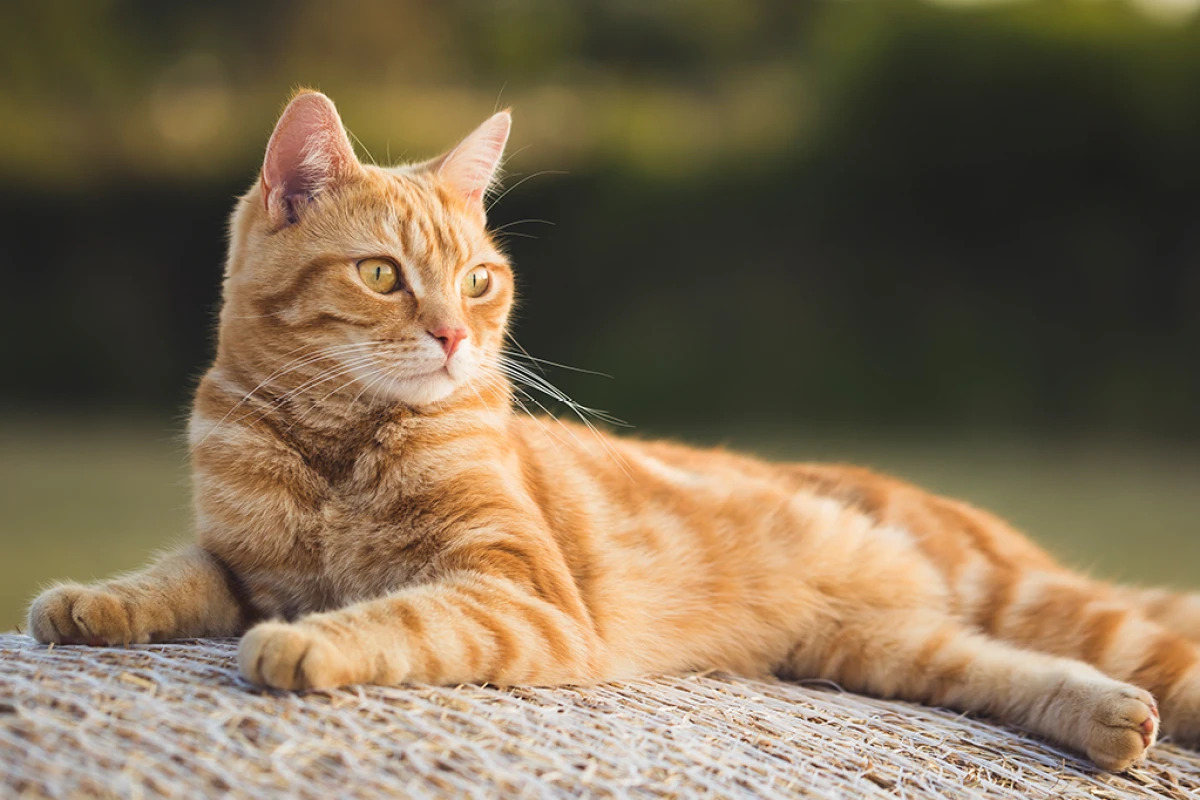

In [ ]:
#mostra a imagem
cv2_imshow(img)

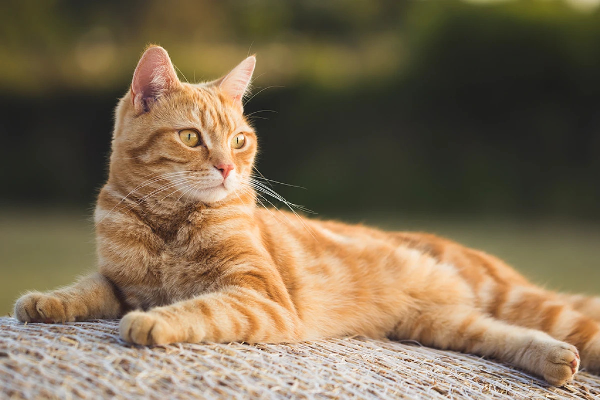

In [ ]:
#reduzir a amostragem de uma imagem pela metade
img = img[::2, ::2]
cv2_imshow(img)

In [ ]:
#Copia a imagem
imagem = img.copy()

In [ ]:
#########################################################################

In [ ]:
'''
ALGORITMO DE ROTULAÇÃO P/ BINARIZAÇÂO
conexidade-4.

1) Algoritmo de Rotulação (20 pt).
'''

In [ ]:
#Primeiramente a imagem será convertida p/ escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

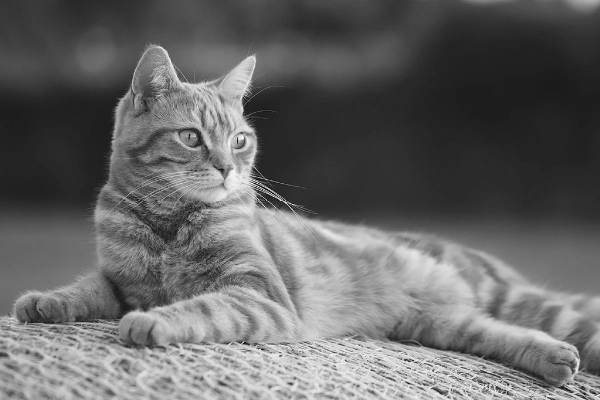

In [ ]:
cv2_imshow(cinza)

In [ ]:
# Binariza a imagem
_, binarizada = cv2.threshold(cinza, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
'''
A função preenche_regiao() vai percorrer a imagem binarizada pixel por pixel,
para verificar se o pixel atual é branco.
A ideia é fazer a busca para encontrar todos os pixels brancos "vizinhos" (que
estejam conectados a esse pixel) e atribuí-los a um mesmo rótulo.

Para isso será preciso criar uma função vizinhos()
que irá receber como parâmetro a posição de um pixel na imagem e
retorna uma lista de tuplas contendo as posições dos pixels vizinhos desse pixel.
'''

In [ ]:
def vizinhos(pos):
    # Define os possíveis vizinhos
    vizinhos = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]

    # Percorre os vizinhos, calculando suas coordenadas absolutas
    coords_vizinhos = [(pos[0]+v[0], pos[1]+v[1]) for v in vizinhos]

    # Retorna apenas os vizinhos que estão dentro dos limites da imagem
    return [(x,y) for x,y in coords_vizinhos if x>=0 and x<binarizada.shape[1] and y>=0 and y<binarizada.shape[0]]


In [ ]:
def preenche_regiao(pos, binarizada, regiao):
    # Adiciona a posição atual na lista de pixels da região
    regiao.append(pos)

    # Percorre os vizinhos do pixel atual
    for v in vizinhos(pos):
        # Se o vizinho for um pixel branco e ainda não estiver na região
        if binarizada[v[1],v[0]] == 255 and not v in regiao:
            # Chama a função recursivamente para preencher a região a partir do vizinho
            regiao = preenche_regiao(v, binarizada, regiao)

    # Retorna a lista atualizada de pixels da região
    return regiao if len(regiao) > 0 else []


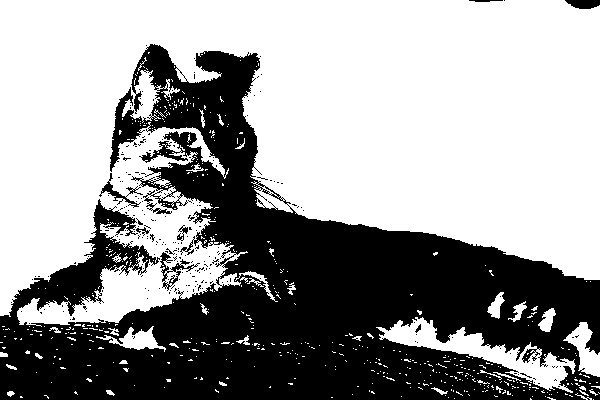

In [ ]:
#Exibe a imagem binarizada
cv2_imshow(binarizada)

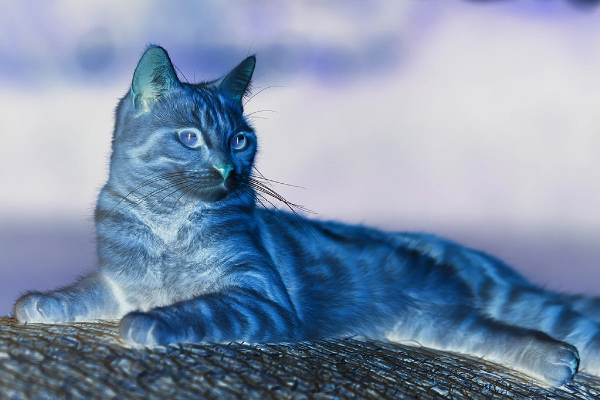

In [ ]:
imgNegativa = img.copy()
#cv2_imshow(imgNegativa)

def negativacao(image):
    resolucao = image.shape[:2]
    img_ng = np.copy(image)
    for linha in range(resolucao[0]):
        for coluna in range(resolucao[1]):
            img_ng[linha][coluna][0] = 255 - image[linha][coluna][0]  # R
            img_ng[linha][coluna][1] = 255 - image[linha][coluna][1]  # G
            img_ng[linha][coluna][2] = 255 - image[linha][coluna][2]  # B
    return img_ng

imgNegativa = negativacao(imgNegativa)
cv2_imshow(imgNegativa)

In [ ]:
'''
Filtros Coloridos:
  Sepia
  Posterização
'''

In [ ]:
#Copia a imagem para iniciar um novo algoritmo
imgSepia = img.copy()

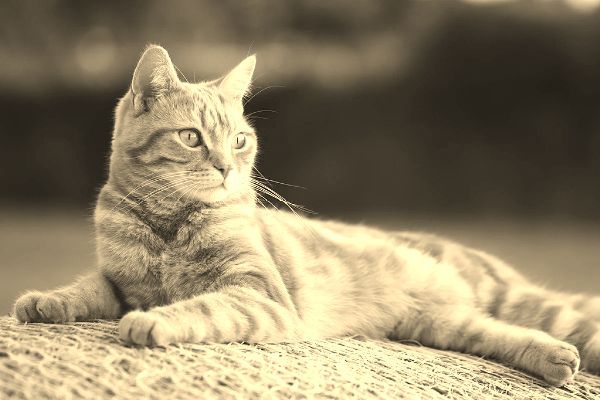

In [ ]:
#Para fazer o filtro é utilizada a função astype()  a Pillow lib do Python.

def apply_sepia_filter(imgSepia):
    # Aplica o filtro Sepia em cada canal de cor da imagem
    b, g, r = cv2.split(imgSepia)
    blue_output = np.clip(0.272 * r + 0.534 * g + 0.131 * b, 0, 255).astype(np.uint8)
    green_output = np.clip(0.349 * r + 0.686 * g + 0.168 * b, 0, 255).astype(np.uint8)
    red_output = np.clip(0.393 * r + 0.769 * g + 0.189 * b, 0, 255).astype(np.uint8)

    # Combina os canais de cor novamente para formar a imagem final
    output_image = cv2.merge([blue_output, green_output, red_output])

    return output_image

sepia_image = apply_sepia_filter(imgSepia)
cv2_imshow(sepia_image)

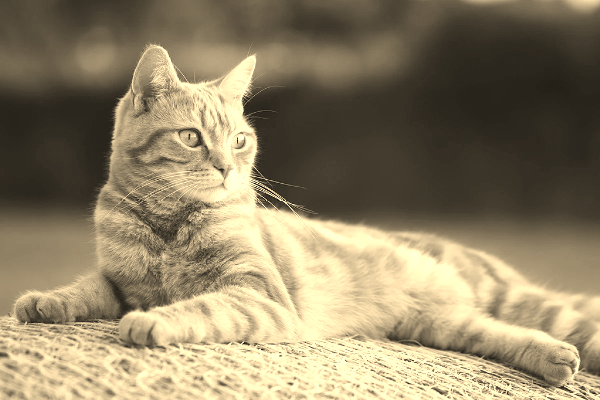

In [ ]:
#copia a imagem carregada para a variavel img
img = imgSepia

def sepia(img):
    # Obter as dimensões da imagem
    altura, largura, canais = img.shape

    # Criar uma nova matriz para a imagem de saída
    img_saida = np.zeros_like(img)

    # Valores para o filtro sepia
    matriz_transformacao = np.array([[0.131, 0.534, 0.272],
                                 [0.168, 0.686, 0.349],
                                 [0.189, 0.769, 0.393]])


    # Percorrer a imagem pixel a pixel
    for i in range(altura):
        for j in range(largura):
            # Aplicar a transformação sepia em cada canal de cor
            r, g, b = img[i, j]
            r_new = min(255, matriz_transformacao[0][0] * r + matriz_transformacao[0][1] * g + matriz_transformacao[0][2] * b)
            g_new = min(255, matriz_transformacao[1][0] * r + matriz_transformacao[1][1] * g + matriz_transformacao[1][2] * b)
            b_new = min(255, matriz_transformacao[2][0] * r + matriz_transformacao[2][1] * g + matriz_transformacao[2][2] * b)

            # Definir os novos valores para os canais de cor
            img_saida[i, j] = [r_new, g_new, b_new]

    # Exibir a imagem com o filtro aplicado
    cv2_imshow(img_saida)

    return img_saida

# Chamar a função com a imagem desejada
img_sepia = sepia(img)

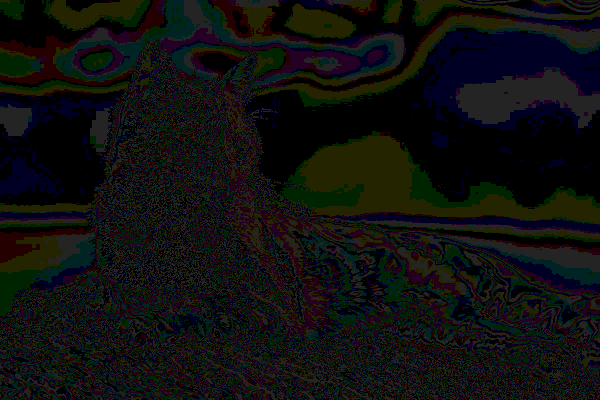

In [ ]:
img = img.copy()
cores = 8

# Aplica a transformação de posterização
#A função convertScaleAbs() é utilizada para converter os valores dos pixels
#de uma imagem para valores inteiros não negativos de 8 bits
img_posterizada = cv2.convertScaleAbs((img * cores) / 255.0) * (255.0 / (cores - 1))
cv2_imshow(img_posterizada)


In [ ]:
'''
Histogramas:
  Histograma colorido (um para cada cor R/G/B).
  Contar o numero de cores de uma imagem TrueColor.
  Equalização do Histograma
'''

'\nHistogramas:\n  Histograma colorido (um para cada cor R/G/B).\n'

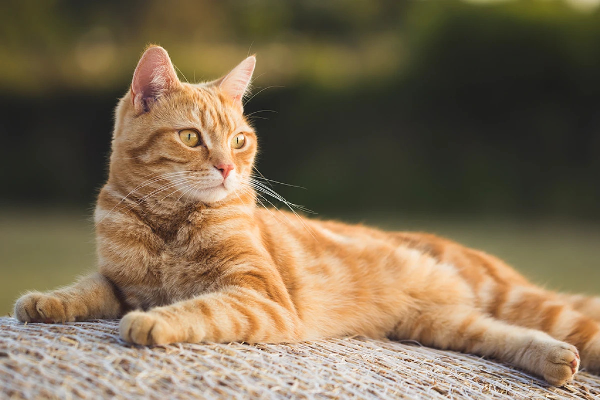

In [ ]:
#Retornando a imagem normal e copiando para o algoritmo novo
img_histog = img.copy()
cv2_imshow(img_histog)

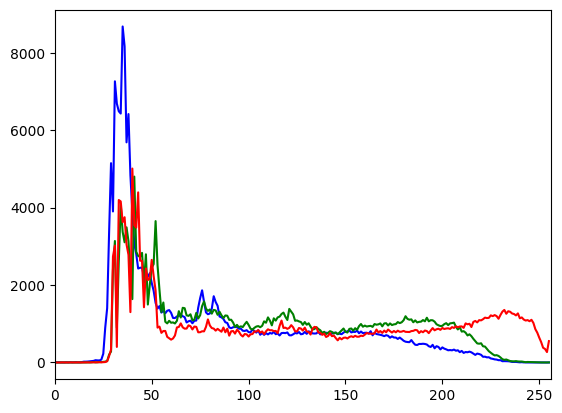

In [ ]:
# Separa os canais de cor
canais = cv2.split(img_histog)

# Define as configurações do histograma
histSize = 256  # Número de bins
histRange = (0, 256)  # Valores dos pixels
accumulate = False  # Histograma não é acumulado

# Calcula o histograma para cada canal de cor
cor = ('b', 'g', 'r')
for i, col in enumerate(cor):
    hist = cv2.calcHist([canais[i]], [0], None, [histSize], histRange, accumulate)
    plt.plot(hist, color=col)
    plt.xlim([0, histSize])

# Mostra o histograma na tela
plt.show()

In [ ]:
# conta o número de cores de cada canal de cor
for i, canal in enumerate(canais):
    n_cores = len(np.unique(canal))
    print(f"O canal {i} tem {n_cores} cores diferentes.")

O canal 0 tem 249 cores diferentes.
O canal 1 tem 248 cores diferentes.
O canal 2 tem 247 cores diferentes.


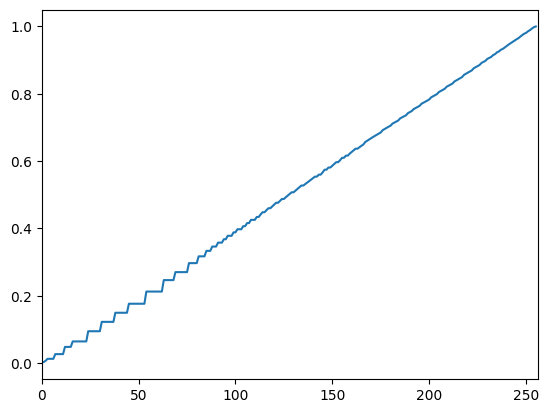

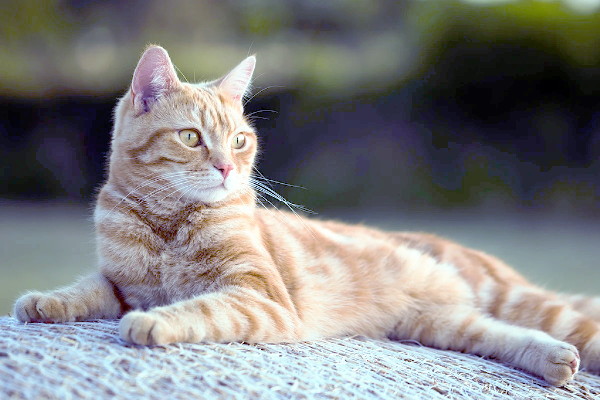

In [ ]:
# Calcula o histograma normalizado para cada canal de cor
hists_norm = []
for i, canal in enumerate(canais):
    hist, _ = np.histogram(canal, bins=histSize, range=histRange)
    hist_norm = hist / (canal.shape[0] * canal.shape[1])
    hists_norm.append(hist_norm)

# Calcula a função de distribuição acumulada (CDF) para cada canal de cor
cdfs = []
for i, hist_norm in enumerate(hists_norm):
    cdf = np.cumsum(hist_norm)
    cdfs.append(cdf)

# Equaliza o histograma de cada canal de cor
canais_eq = []
for i, canal in enumerate(canais):
    canal_eq = cv2.equalizeHist(canal)
    canais_eq.append(canal_eq)

# Calcula a função de distribuição acumulada (CDF) da imagem equalizada
hist_eq = cv2.calcHist(canais_eq, [0], None, [histSize], histRange, accumulate=True)
hist_eq_norm = hist_eq / (img.shape[0] * img.shape[1])
cdf_eq = np.cumsum(hist_eq_norm)

# Exibe o histograma da imagem equalizada
plt.plot(cdf_eq)
plt.xlim([0, histSize])
plt.show()

# Junta os canais de cor para formar a imagem equalizada
img_eq = cv2.merge(canais_eq)

cv2_imshow(img_eq)

In [ ]:
'''
Detecção de Bordas
  Operador de Roberts.
'''

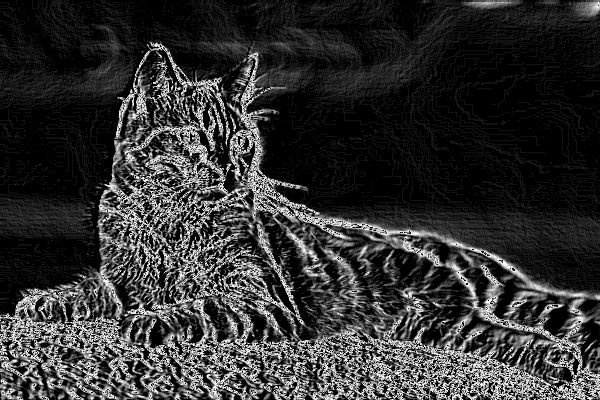

In [ ]:
#Copia a imagem original para o novo algoritmo
img_bordas = img.copy()

# Converte a imagem para escala de cinza
img_bordas = cv2.cvtColor(img_bordas, cv2.COLOR_RGB2GRAY)

# Aplica um filtro de suavização na imagem
img_bordas = cv2.GaussianBlur(img_bordas, (3, 3), 0)

# Aplica o operador de Roberts
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, -1], [1, 0]], dtype=np.float32)

img_bordas_x = cv2.filter2D(img_bordas, -1, kernel_x)
img_bordas_y = cv2.filter2D(img_bordas, -1, kernel_y)
img_bordas = np.sqrt(img_bordas_x ** 2 + img_bordas_y ** 2)

# Converte a imagem para o tipo uint8
img_bordas = np.uint8(np.absolute(img_bordas))

img_bordas = cv2.convertScaleAbs(img_bordas)

# Normaliza o resultado para que os valores fiquem entre 0 e 255
img_bordas = cv2.normalize(img_bordas, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Exibe a imagem resultante
cv2_imshow(img_bordas)

<ipython-input-171-38e90fc93f7f>:12: RuntimeWarning: invalid value encountered in sqrt
  img_sobel = np.sqrt(img_bordas_x ** 2 + img_bordas_y ** 2)


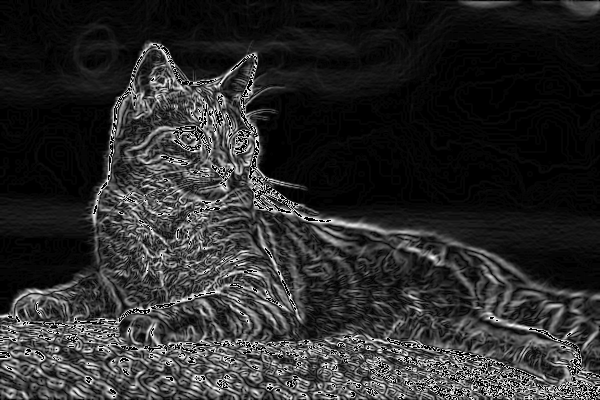

In [ ]:
img_sobel = img.copy()

# Converte a imagem para escala de cinza
img_sobel = cv2.cvtColor(img_sobel, cv2.COLOR_RGB2GRAY)

# Aplica um filtro de suavização na imagem
img_sobel = cv2.GaussianBlur(img_sobel, (3, 3), 0)

# Aplica o operador de Sobel
img_bordas_x = cv2.Sobel(img_sobel, cv2.CV_16S, 1, 0)
img_bordas_y = cv2.Sobel(img_sobel, cv2.CV_16S, 0, 1)
img_sobel = np.sqrt(img_bordas_x ** 2 + img_bordas_y ** 2)

# Converte a imagem para o tipo uint8
img_sobel = np.uint8(np.absolute(img_sobel))

img_sobel = cv2.convertScaleAbs(img_sobel)

# Normaliza o resultado para que os valores fiquem entre 0 e 255
img_sobel = cv2.normalize(img_sobel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Exibe a imagem resultante
cv2_imshow(img_sobel)

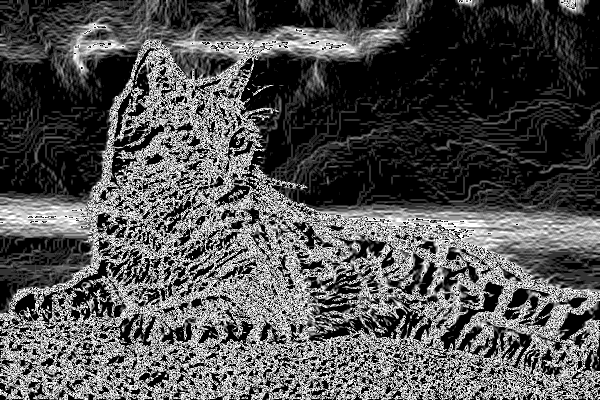

In [ ]:
img_prewitt = img.copy()

# Converte a imagem para escala de cinza
img_prewitt = cv2.cvtColor(img_prewitt, cv2.COLOR_RGB2GRAY)

# Aplica um filtro de suavização na imagem
img_prewitt = cv2.GaussianBlur(img_prewitt, (3, 3), 0)

# Aplica o operador de Prewitt
# O operador de Prewitt utiliza os seguintes kernels para as derivadas em x e y:
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

img_prewitt_x = cv2.filter2D(img_prewitt, -1, kernel_x)
img_prewitt_y = cv2.filter2D(img_prewitt, -1, kernel_y)
img_prewitt = np.sqrt(img_prewitt_x ** 2 + img_prewitt_y ** 2)

# Converte a imagem para o tipo uint8
img_prewitt = np.uint8(np.absolute(img_prewitt))

img_prewitt = cv2.convertScaleAbs(img_prewitt)

# Normaliza o resultado para que os valores fiquem entre 0 e 255
img_prewitt = cv2.normalize(img_prewitt, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Exibe a imagem resultante
cv2_imshow(img_prewitt)

In [ ]:
'''
Filtros Morfológicos de Abertura e Rotação
'''

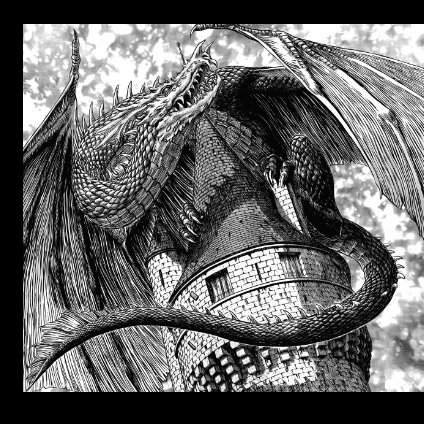

In [ ]:
# carrega a imagem do Google Drive
cv2_imshow(img2)

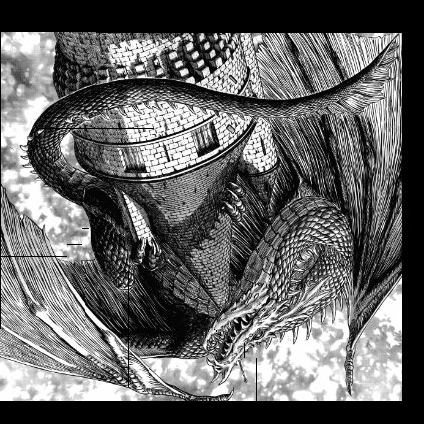

In [ ]:
import math

# Cópia da imagem original
img_rotate = img2.copy()

def rotate_image(image, angle):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Obtém as dimensões da imagem
    height, width = image.shape[:2]

    # Calcula o ângulo em radianos
    angle = math.radians(angle)

    # Calcula o seno e cosseno do ângulo
    cos_theta = math.cos(angle)
    sin_theta = math.sin(angle)

    # Calcula as dimensões da imagem rotacionada
    new_width = round(abs(width * cos_theta) + abs(height * sin_theta))
    new_height = round(abs(width * sin_theta) + abs(height * cos_theta))

    # Cria a nova imagem com as dimensões calculadas
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Define o ponto de rotação no centro da imagem
    cx = width / 2
    cy = height / 2

    # Percorre cada pixel da imagem original
    for y in range(height):
        for x in range(width):
            # Calcula a posição do pixel rotacionado
            new_x = (x - cx) * cos_theta + (y - cy) * sin_theta + new_width / 2
            new_y = -(x - cx) * sin_theta + (y - cy) * cos_theta + new_height / 2

            # Copia o valor do pixel para a nova imagem
            if new_x >= 0 and new_x < new_width and new_y >= 0 and new_y < new_height:
                new_image[int(new_y), int(new_x)] = image[y, x]

    return new_image

# rotaciona a imagem em X graus
img_rotate = rotate_image(img_rotate, 180)
#img_rotate = rotate_image(img_rotate, 90)
#img_rotate = rotate_image(img_rotate, 330)
cv2_imshow(img_rotate)

In [ ]:
img_erosao = img2.copy()
#cv2_imshow(img_erosao)

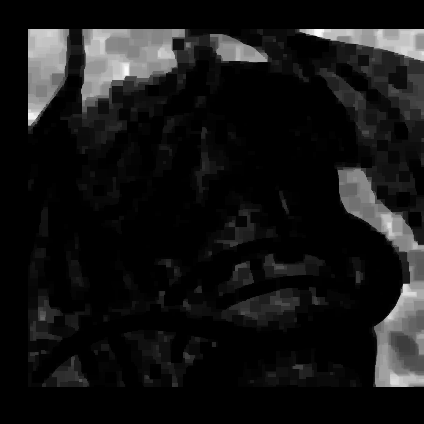

In [ ]:
# Filtro morfológico de abertura
kernel = np.ones((3,3),np.uint8)
img_erosao = cv2.erode(img_erosao, kernel, iterations = 1)
img_abertura = cv2.dilate(img_erosao, kernel, iterations = 1)

# Mostra a imagem resultante
cv2_imshow(img_abertura)